<a href="https://colab.research.google.com/github/kimhwijin/HandsOnMachineLearing/blob/main/HOML_Exercise_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tensorflow import keras


keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)


# Make_MNIST_MODEL

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train = X_train / 255.
X_test = X_test / 255.
X_train, X_valid = X_train[5000:] , X_train[:5000]
y_train, y_valid = y_train[5000:] , y_train[:5000]

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, strides=1, padding="same"),
    keras.layers.Conv2D(64, kernel_size=3, strides=1, padding="same"),
    keras.layers.MaxPooling2D(pool_size=3, strides=1, padding="same"),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax'),
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

In [4]:
model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/50
1719/1719 [==============================] - 47s 19ms/step - loss: 0.2015 - accuracy: 0.9397 - val_loss: 0.0672 - val_accuracy: 0.9812
Epoch 2/50
1719/1719 [==============================] - 33s 19ms/step - loss: 0.1158 - accuracy: 0.9653 - val_loss: 0.0613 - val_accuracy: 0.9824
Epoch 3/50
1719/1719 [==============================] - 33s 19ms/step - loss: 0.1016 - accuracy: 0.9697 - val_loss: 0.0528 - val_accuracy: 0.9870
Epoch 4/50
1719/1719 [==============================] - 33s 19ms/step - loss: 0.0900 - accuracy: 0.9734 - val_loss: 0.0468 - val_accuracy: 0.9892
Epoch 5/50
1719/1719 [==============================] - 33s 19ms/step - loss: 0.0842 - accuracy: 0.9746 - val_loss: 0.0436 - val_accuracy: 0.9884
Epoch 6/50
1719/1719 [==============================] - 32s 19ms/step - loss: 0.0787 - accuracy: 0.9768 - val_loss: 0.0470 - val_accuracy: 0.9882
Epoch 7/50
1719/1719 [==============================] - 33s 19ms/step - loss: 0.0754 - accuracy: 0.9783 - val_loss: 0.0489 -

In [5]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0528 - accuracy: 0.9862


[0.05282001197338104, 0.9861999750137329]

# MaxPooliing->stride=2Conv

In [6]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, strides=1, padding="same"),
    keras.layers.Conv2D(64, kernel_size=3, strides=1, padding="same"),
    keras.layers.Conv2D(64, kernel_size=3, strides=2, padding="same"),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax'),
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/50
1719/1719 [==============================] - 25s 14ms/step - loss: 0.3570 - accuracy: 0.8928 - val_loss: 0.1316 - val_accuracy: 0.9620
Epoch 2/50
1719/1719 [==============================] - 23s 14ms/step - loss: 0.2321 - accuracy: 0.9318 - val_loss: 0.1105 - val_accuracy: 0.9684
Epoch 3/50
1719/1719 [==============================] - 23s 13ms/step - loss: 0.2060 - accuracy: 0.9391 - val_loss: 0.0880 - val_accuracy: 0.9734
Epoch 4/50
1719/1719 [==============================] - 24s 14ms/step - loss: 0.1856 - accuracy: 0.9438 - val_loss: 0.0903 - val_accuracy: 0.9744
Epoch 5/50
1719/1719 [==============================] - 23s 13ms/step - loss: 0.1746 - accuracy: 0.9475 - val_loss: 0.0881 - val_accuracy: 0.9740
Epoch 6/50
1719/1719 [==============================] - 23s 13ms/step - loss: 0.1655 - accuracy: 0.9497 - val_loss: 0.0921 - val_accuracy: 0.9748
Epoch 7/50
1719/1719 [==============================] - 23s 13ms/step - loss: 0.1589 - accuracy: 0.9511 - val_loss: 0.0843 -

In [7]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0985 - accuracy: 0.9721


[0.0985235646367073, 0.972100019454956]

# Add_BatchNormalization

In [8]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, strides=1, padding="same", activation='relu'),
    keras.layers.Conv2D(64, kernel_size=3, strides=1, padding="same", activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.BatchNormalization(),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax'),
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/50
1719/1719 [==============================] - 22s 12ms/step - loss: 0.1886 - accuracy: 0.9441 - val_loss: 0.0523 - val_accuracy: 0.9840
Epoch 2/50
1719/1719 [==============================] - 20s 12ms/step - loss: 0.0880 - accuracy: 0.9745 - val_loss: 0.0497 - val_accuracy: 0.9844
Epoch 3/50
1719/1719 [==============================] - 20s 12ms/step - loss: 0.0678 - accuracy: 0.9793 - val_loss: 0.0731 - val_accuracy: 0.9816
Epoch 4/50
1719/1719 [==============================] - 20s 11ms/step - loss: 0.0569 - accuracy: 0.9832 - val_loss: 0.0396 - val_accuracy: 0.9894
Epoch 5/50
1719/1719 [==============================] - 20s 11ms/step - loss: 0.0538 - accuracy: 0.9836 - val_loss: 0.0399 - val_accuracy: 0.9886
Epoch 6/50
1719/1719 [==============================] - 20s 12ms/step - loss: 0.0489 - accuracy: 0.9857 - val_loss: 0.0497 - val_accuracy: 0.9886
Epoch 7/50
1719/1719 [==============================] - 20s 11ms/step - loss: 0.0447 - accuracy: 0.9870 - val_loss: 0.0426 -

In [9]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0424 - accuracy: 0.9915


[0.04241926968097687, 0.9915000200271606]

# Dense->Conv2d layer

In [10]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, strides=1, padding="same", activation='relu'),
    keras.layers.Conv2D(64, kernel_size=3, strides=1, padding="same", activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.BatchNormalization(),
    #keras.layers.Flatten(),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(128, kernel_size=14, strides=1, padding="valid", activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Conv2D(10, kernel_size=1, strides=1, padding="valid", activation='softmax'),
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=5)])
model.evaluate(X_test, y_test)

Epoch 1/50
1719/1719 [==============================] - 28s 15ms/step - loss: 0.1773 - accuracy: 0.1268 - val_loss: 0.0778 - val_accuracy: 0.1248
Epoch 2/50
1719/1719 [==============================] - 26s 15ms/step - loss: 0.0839 - accuracy: 0.1272 - val_loss: 0.0473 - val_accuracy: 0.1250
Epoch 3/50
1719/1719 [==============================] - 27s 15ms/step - loss: 0.0689 - accuracy: 0.1279 - val_loss: 0.0443 - val_accuracy: 0.1251
Epoch 4/50
1719/1719 [==============================] - 26s 15ms/step - loss: 0.0568 - accuracy: 0.1279 - val_loss: 0.0404 - val_accuracy: 0.1252
Epoch 5/50
1719/1719 [==============================] - 26s 15ms/step - loss: 0.0546 - accuracy: 0.1277 - val_loss: 0.0568 - val_accuracy: 0.1251
Epoch 6/50
1719/1719 [==============================] - 26s 15ms/step - loss: 0.0505 - accuracy: 0.1280 - val_loss: 0.0346 - val_accuracy: 0.1252
Epoch 7/50
1719/1719 [==============================] - 27s 15ms/step - loss: 0.0439 - accuracy: 0.1275 - val_loss: 0.0437 -

[0.06257651001214981, 0.12283889949321747]

# Tensorflow_Hub_StyleTransferExample

In [13]:
import tensorflow_hub as hub
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False
import PIL.Image
import time
import functools

In [20]:
def tensor_to_image(tensor):
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.dim(tensor)>3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return PIL.Image.fromarray(tensor)

def load_image(path_to_image):
    max_dim = 512
    image = tf.io.read_file(path_to_image)
    image = tf.image.decode_image(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    
    shape = tf.cast(tf.shape(image)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim

    new_shape = tf.cast(shape * scale, dtype=tf.int32)

    image = tf.image.resize(image, new_shape)
    image = image[tf.newaxis, :]
    return image

def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

In [15]:
#url에서 파일가져오기
content_path = tf.keras.utils.get_file('YellowLabradorLooking_new.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')
style_path = tf.keras.utils.get_file('kandinsky5.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg')

204800/195196 [===============================] - 0s 0us/step


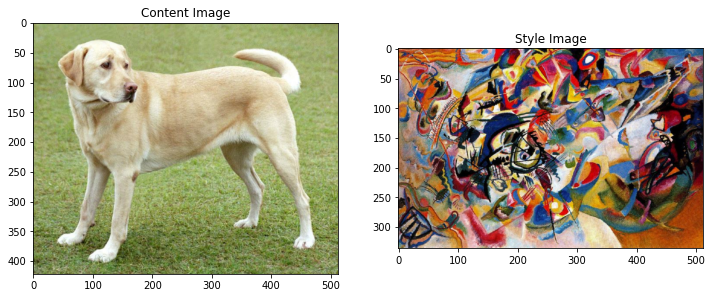

In [21]:
content_image = load_image(content_path)
style_image = load_image(style_path)

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

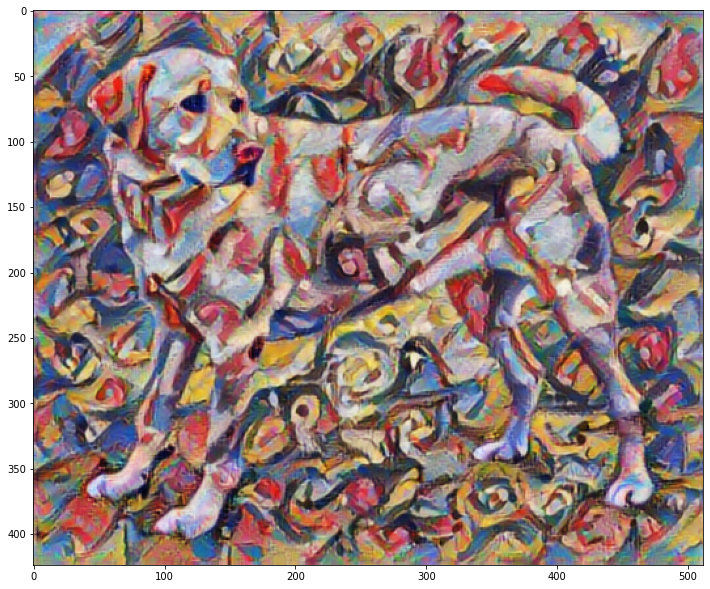

In [31]:
hub_style_transfer_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_style_transfer_module(tf.constant(content_image), tf.constant(style_image))[0]
plt.imshow(stylized_image[0, ...])

In [38]:
x = tf.image.resize(content_image, [224, 224])
x = keras.applications.vgg19.preprocess_input(x*255)
vgg = keras.applications.VGG19(include_top=True, weights="imagenet")
predictions = vgg(x)
predictions = keras.applications.vgg19.decode_predictions(predictions.numpy())
print(*predictions[0], sep='\n')

('n02099712', 'Labrador_retriever', 0.4931709)
('n02099601', 'golden_retriever', 0.23665306)
('n02104029', 'kuvasz', 0.036357537)
('n02099849', 'Chesapeake_Bay_retriever', 0.02418276)
('n02107574', 'Greater_Swiss_Mountain_dog', 0.018646078)


In [39]:
vgg = keras.applications.VGG19(include_top=False, weights='imagenet')
for layer in vgg.layers:
  print(layer.name)

80150528/80134624 [==============================] - 1s 0us/step
input_7
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool


In [78]:
#콘텐츠 층, 스타일 층
content_layers = ['block5_conv2'] 

style_layers = ['block1_conv1',
                'block2_conv1',
                'block3_conv1', 
                'block4_conv1', 
                'block5_conv1']
num_content_layers = len(content_layers)
num_style_layers = len(style_layers)

def extractor_vgg_layers(layer_names):
    vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')
    vgg.trainable = False
    
    outputs = [vgg.get_layer(name).output for name in layer_names]
    model = keras.models.Model([vgg.input], outputs)
    return model



style_extractor = extractor_vgg_layer(style_layers)
#이미지에 대한 각 스타일 층의 출력계산.
style_outputs = style_extractor(style_image*255)

for name , output in zip(style_layers, style_outputs):
    print(name)
    print("  크기: ", output.numpy().shape)
    print("  최솟값: ", output.numpy().min())
    print("  최댓값: ", output.numpy().max())
    print("  평균: ", output.numpy().mean())
    print()

content_extractor = extractor_vgg_layer(content_layers)
#이미지에 대한 각 스타일 층의 출력계산.
content_outputs = content_extractor(content_image*255)

for name , output in zip(content_layers, content_outputs):
    print(name)
    print("  크기: ", output.numpy().shape)
    print("  최솟값: ", output.numpy().min())
    print("  최댓값: ", output.numpy().max())
    print("  평균: ", output.numpy().mean())
    print()

block1_conv1
  크기:  (1, 336, 512, 64)
  최솟값:  0.0
  최댓값:  835.5256
  평균:  33.97525

block2_conv1
  크기:  (1, 168, 256, 128)
  최솟값:  0.0
  최댓값:  4625.887
  평균:  199.82687

block3_conv1
  크기:  (1, 84, 128, 256)
  최솟값:  0.0
  최댓값:  8789.237
  평균:  230.78099

block4_conv1
  크기:  (1, 42, 64, 512)
  최솟값:  0.0
  최댓값:  21566.14
  평균:  791.24005

block5_conv1
  크기:  (1, 21, 32, 512)
  최솟값:  0.0
  최댓값:  3189.2537
  평균:  59.179485

block5_conv2
  크기:  (26, 32, 512)
  최솟값:  0.0
  최댓값:  2373.4565
  평균:  17.154436



In [79]:
#이미지의 스타일은 각 특성맵들의 평균과 상관관계로 나타낼 수 있다.
#각 위치에서 특성벡터끼리의 외적을 구하고 평균하여 그람 행렬을 구한다.
def gram_matrix(input_tensor):
    #tf.linalg.einsum 이해부족
    result = tf.linalg.einsum('bijc,bijd->bcd', input_tensor, input_tensor)
    input_shape = tf.shape(input_tensor)
    num_locations = tf.cast(input_shape[1]*input_shape[2], tf.float32)
    return result/(num_locations)


In [84]:
#스타일과 콘텐츠 텐서를 반환하는 모델 생성
class StyleContentModel(keras.models.Model):
    def __init__(self, style_layers, content_layers, **kwargs):
        super(StyleContentModel, self).__init__(**kwargs)
        self.vgg = extractor_vgg_layers(style_layers + content_layers)
        self.style_layers = style_layers
        self.content_layers = content_layers
        self.num_style_layers = len(style_layers)
        self.vgg.trainable = False
    
    def call(self, inputs):
        #[0, 1] 인풋
        inputs = inputs*255
        preprocessed_inputs = keras.applications.vgg19.preprocess_input(inputs)
        #스타일, 콘텐츠 층의 모든 출력
        outputs = self.vgg(preprocessed_inputs)
        #스타일 층이 먼저
        style_outputs, content_outputs = outputs[:self.num_style_layers], outputs[self.num_style_layers:]

        #스타일 층 출력에만 gram_matrix 적용
        style_outputs = [gram_matrix(style_output) for style_output in style_outputs]

        #스타일 층과 콘텐츠 층 출력을 딕셔너리로 저장
        content_dict = {content_name: value for content_name, value in zip(self.content_layers, content_outputs)}
        style_dict = {style_name: value for style_name, value in zip(self.style_layers, style_outputs)}
        return {"content": content_dict, "style": style_dict}   


extractor = StyleContentModel(style_layers, content_layers)
results = extractor(tf.constant(content_image))
print('스타일:')
for name, output in sorted(results['style'].items()):
  print("  ", name)
  print("    크기: ", output.numpy().shape)
  print("    최솟값: ", output.numpy().min())
  print("    최댓값: ", output.numpy().max())
  print("    평균: ", output.numpy().mean())
  print()

print("콘텐츠:")
for name, output in sorted(results['content'].items()):
  print("  ", name)
  print("    크기: ", output.numpy().shape)
  print("    최솟값: ", output.numpy().min())
  print("    최댓값: ", output.numpy().max())
  print("    평균: ", output.numpy().mean())

스타일:
   block1_conv1
    크기:  (1, 64, 64)
    최솟값:  0.0055228444
    최댓값:  28014.557
    평균:  263.79025

   block2_conv1
    크기:  (1, 128, 128)
    최솟값:  0.0
    최댓값:  61479.473
    평균:  9100.949

   block3_conv1
    크기:  (1, 256, 256)
    최솟값:  0.0
    최댓값:  545623.44
    평균:  7660.9766

   block4_conv1
    크기:  (1, 512, 512)
    최솟값:  0.0
    최댓값:  4320505.0
    평균:  134288.84

   block5_conv1
    크기:  (1, 512, 512)
    최솟값:  0.0
    최댓값:  110005.39
    평균:  1487.0378

콘텐츠:
   block5_conv2
    크기:  (1, 26, 32, 512)
    최솟값:  0.0
    최댓값:  2410.8772
    평균:  13.764149


# 새 섹션